In [2]:
import numpy as np
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib notebook

mpl.rcParams['axes.spines.top'] = 0
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['axes.spines.left'] = 1
mpl.rcParams['axes.spines.bottom'] = 1
mpl.rcParams.update({'font.size': 12})

<IPython.core.display.Javascript object>


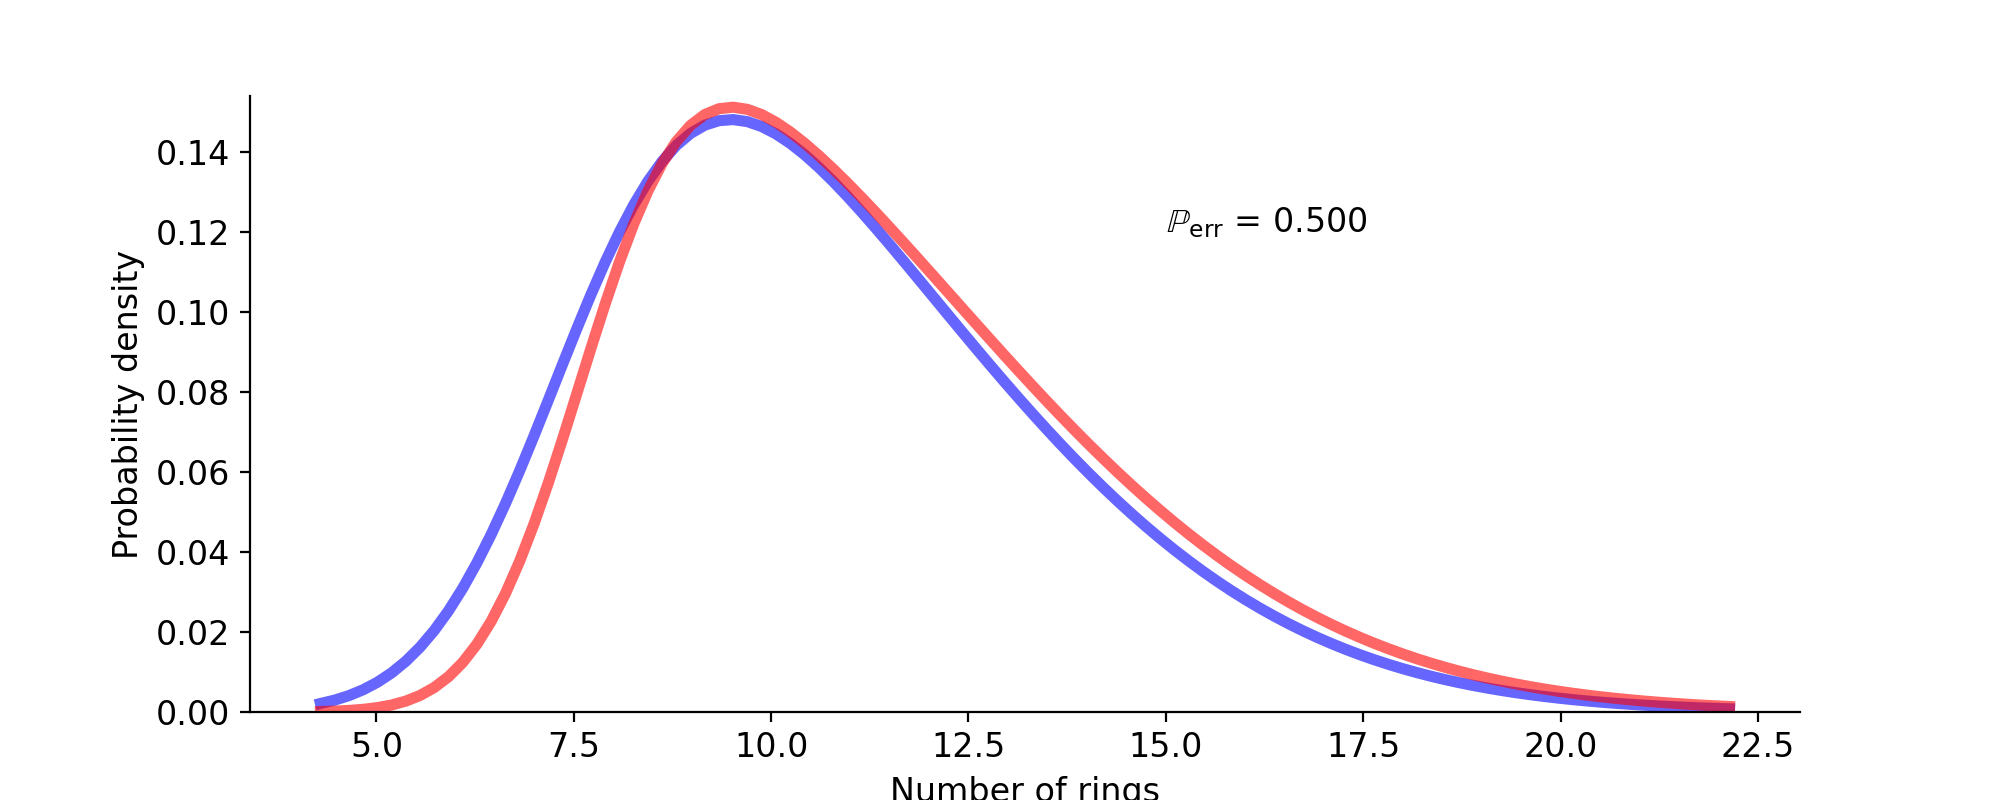

interactive(children=(FloatSlider(value=15.0, description='thr', max=22.5, min=5.0), Output()), _dom_classes=(…

In [6]:
from scipy.stats import skewnorm

l1, s1, a1 = 7.40, 4.48, 3.12
l2, s2, a2 = 7.63, 4.67, 4.34

x = np.linspace(skewnorm.ppf(0.001, a1, loc=l1, scale=s1),
                skewnorm.ppf(0.999, a1, loc=l1, scale=s1), 
                100)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
line1, = ax.plot(x, skewnorm.pdf(x, a1, loc=l1, scale=s1),
       'b-', lw=4, alpha=0.6, label='skewnorm pdf')
line2, = ax.plot(x, skewnorm.pdf(x, a2, loc=l2, scale=s2),
       'r-', lw=4, alpha=0.6, label='skewnorm pdf')
text = ax.text(15, 0.12, '0.000')

ax.set_xlabel('Number of rings')
ax.set_ylabel('Probability density')
ax.set_ylim(0, 0.154)

thr0 = 15
thrline, = ax.plot([thr0, thr0], [0, 0.20])

def update(thr=thr0):
    err1 = skewnorm.cdf(thr, a2, loc=l2, scale=s2)
    err2 = 1 - skewnorm.cdf(thr, a1, loc=l1, scale=s1)
    
    p_error = (err1 + err2) / 2
    
    thrline.set_xdata([thr, thr])
    text.set_text('$\mathbb{P}_{\mathrm{err}}$ = %0.3f' % (p_error,))
    fig.canvas.draw_idle()
    
interact(update, thr=(5.0, 22.5, 0.1));

# Example: signal and noise, or needle in a haystack

- Suppose that 
    - when $Y = 0$ we observe $\omega$, where $\omega \sim \mathcal{N}(0, 1)$
    - when $Y = 1$ we observe $\omega + s$ for a deterministic scalar $s$
- Then
$$
\begin{align}
    p(x \,|\, Y = 0) &= \mathcal{N}(0, 1) = \tfrac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \\
    p(x \,|\, Y = 1) &= \mathcal{N}(s, 1) = \tfrac{1}{\sqrt{2\pi}} e^{-\frac{(x - s)^2}{2}}
\end{align}
$$
- The shift $s$ determines how hard it is to predict $Y$

<IPython.core.display.Javascript object>


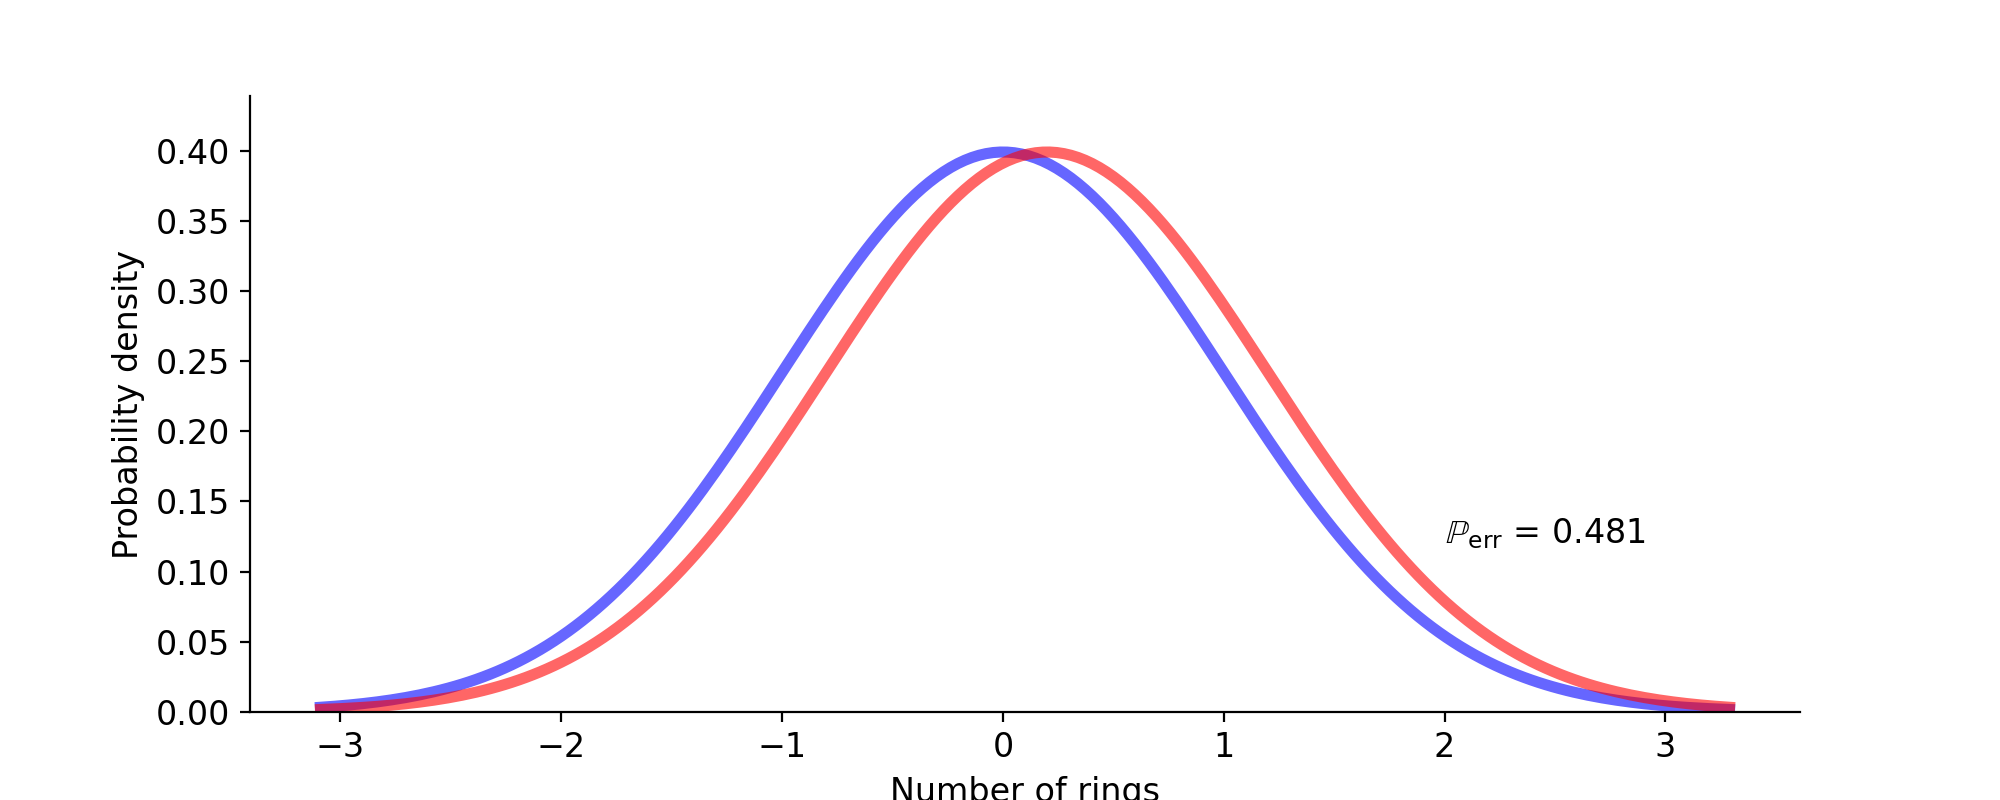

interactive(children=(FloatSlider(value=0.0, description='thr', max=3.2902323061678134, min=-3.090232306167813…

In [5]:
from scipy.stats import norm

sigma = 1
loc1 = 0.0
loc2 = 0.2

x_min = norm.ppf(0.001, loc=min(loc1, loc2), scale=sigma)
x_max = norm.ppf(0.999, loc=max(loc1, loc2), scale=sigma)
x = np.linspace(x_min, x_max, 200)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
line1, = ax.plot(x, norm.pdf(x, loc=loc1, scale=sigma),
       'b-', lw=4, alpha=0.6, label='skewnorm pdf')
line2, = ax.plot(x, norm.pdf(x, loc=loc2, scale=sigma),
       'r-', lw=4, alpha=0.6, label='skewnorm pdf')
text = ax.text(2, 0.12, '$\mathbb{P}_{\mathrm{err}}$ = %0.3f' % (0,))

ax.set_xlabel('Number of rings')
ax.set_ylabel('Probability density')
y_max = 1.1 / sigma / np.sqrt(2 * np.pi)
ax.set_ylim(0, y_max)

thr0 = 0
thrline, = ax.plot([thr0, thr0], [0, y_max], 'k')

def update(thr=thr0):
    err2 = 1 - norm.cdf(thr, loc=loc1, scale=sigma)
    err1 = norm.cdf(thr, loc=loc2, scale=sigma)
    
    p_error = (err1 + err2) / 2
    
    thrline.set_xdata([thr, thr])
    text.set_text('$\mathbb{P}_{\mathrm{err}}$ = %0.3f' % (p_error,))
    fig.canvas.draw_idle()
    
interact(update, thr=(x_min, x_max, (x_max - x_min) / 200));